In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import math
from scipy.stats import poisson

In [2]:
#Read in data accepting rides vs price data
data = pd.read_excel(r'driverAcceptanceData.xlsx')

In [3]:
#Setting x and y for logistic regression
y = data['ACCEPTED'].to_numpy()
x = data['PAY'].to_numpy().reshape(-1,1)

In [4]:
#Logistic regression model
model = LogisticRegression(solver='liblinear',random_state=0)

In [5]:
#Fitting model
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
#B0/A coefficient for binary logistical regression
model.intercept_

array([-5.49486463])

In [7]:
#B1/B coefficient for binary logistical regression
model.coef_

array([[0.22278279]])

In [8]:
#P values per price (x values)
model.predict_proba(x)

array([[0.26004097, 0.73995903],
       [0.59237466, 0.40762534],
       [0.814609  , 0.185391  ],
       ...,
       [0.02005085, 0.97994915],
       [0.95592545, 0.04407455],
       [0.62819035, 0.37180965]])

In [9]:
#Prediction if driver will accept ride based on probability from x values
model.predict(x)

array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [10]:
#How close the model was to predicting the correct driver outcome
model.score(x,y)

0.831

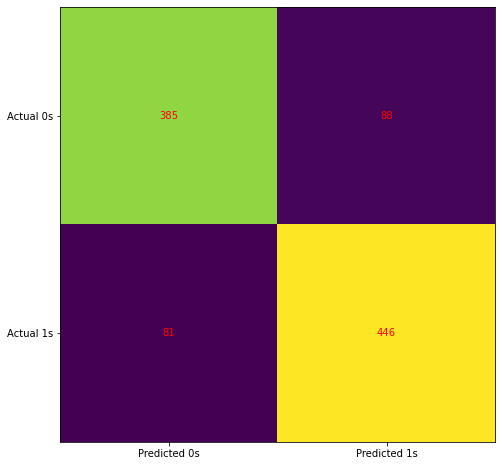

In [11]:
#Showing confusion matrix of negatives and positives of model vs actual data
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j],ha='center', va='center', color='red')
plt.show()

In [12]:
#Classification report from model
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       473
         1.0       0.84      0.85      0.84       527

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



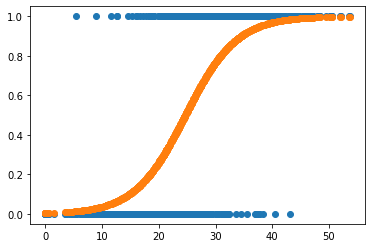

In [13]:
#Sketch of driver accept or reject data with probability data per price
plt.scatter(x,y)
plt.scatter(x,model.predict_proba(x)[:,1:].flatten())

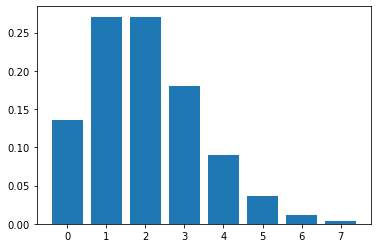

0.1353352832366127

In [14]:
#Illustration of Poisson distribution for lambda = 1
x = np.arange(0, 8, 1)
y = poisson.pmf(x, mu=2)
plt.bar(x, y)
plt.show()
y[0]

In [15]:
#Inputs for MODEL 1
#Cost to acquire rider
price_to_acquire = 30
#Fixed price to charge rider
ride_cost = 30

In [17]:
#MODEL 1: assume P is continuous from 0 to 1
#Did not do this in a for loop because I wanted to investigate tweaking certain parameters of the model
z = []
for yearly_riders in np.arange(1000,11000,1000):

    
    for P_ideal in np.arange(0.1,0.8,0.05):
    
        #Calculating the amount to pay the driver for a given probability of them accepting the ride
        D_pay_ideal = (np.log(P_ideal/(1-P_ideal)) - model.intercept_)/model.coef_
        D_pay_ideal = D_pay_ideal[0,0] 
        
    #---------------------
    #Month 1
        month_1_acq =  yearly_riders/12
        d = []
        lambda_1 = 1
        lambda_1_range = 7
        for i in range (lambda_1_range):
            for j in range (i+1):
                d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_1_acq*(poisson.pmf(np.arange(0,lambda_1_range,1), mu=lambda_1)[i]))
                    }
                )

        month_1 = pd.DataFrame(d)

        month_1_outcome = month_1.iloc[:,1:].groupby('Successful_calls').sum()
        month_1_outcome = month_1_outcome.reset_index()

        month_1_outcome["income"] = month_1_outcome["Successful_calls"]*month_1_outcome["Nr_customers"]*(ride_cost)
        month_1_outcome["expense_drivers"] = month_1_outcome["Successful_calls"]*month_1_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 2
        #Extracting number of customers per successful ride hails
        month_2_input = month_1_outcome.iloc[:5, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_2_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_2_input[1,1] = month_2_input[1,1] + month_2_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_2_input)):
            for i in range(5 + 2*month_2_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_2_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_2_input[k,0].astype(int),1), mu=month_2_input[k,0].astype(int))[i]))
                    }
                )

        month_2 = pd.DataFrame(d) 

        #Grouping and summing customers according to how many rides they successfully hailed
        month_2_outcome = month_2.iloc[:,1:].groupby('Successful_calls').sum()
        month_2_outcome = month_2_outcome.reset_index()
        #calculating income and expense per customer
        month_2_outcome["income"] = month_2_outcome["Successful_calls"]*month_2_outcome["Nr_customers"]*(ride_cost)
        month_2_outcome["expense_drivers"] = month_2_outcome["Successful_calls"]*month_2_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 3
        #Extracting number of customers per successful ride hails
        month_3_input = month_2_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_3_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_3_input[1,1] = month_3_input[1,1] + month_3_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_3_input)):
            for i in range(5 + 2*month_3_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_3_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_3_input[k,0].astype(int),1), mu=month_3_input[k,0].astype(int))[i]))
                    }
                )

        month_3 = pd.DataFrame(d)  

        #Grouping and summing customers according to how many rides they successfully hailed
        month_3_outcome = month_3.iloc[:,1:].groupby('Successful_calls').sum()
        month_3_outcome = month_3_outcome.reset_index()

        #calculating income and expense per customer
        month_3_outcome["income"] = month_3_outcome["Successful_calls"]*month_3_outcome["Nr_customers"]*(ride_cost)
        month_3_outcome["expense_drivers"] = month_3_outcome["Successful_calls"]*month_3_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 4
        #Extracting number of customers per successful ride hails
        month_4_input = month_3_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_4_acq =  yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_4_input[1,1] = month_4_input[1,1] + month_4_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_4_input)):
            for i in range(5 + 2*month_4_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_4_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_4_input[k,0].astype(int),1), mu=month_4_input[k,0].astype(int))[i]))
                    }
                )

        month_4 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_4_outcome = month_4.iloc[:,1:].groupby('Successful_calls').sum()
        month_4_outcome = month_4_outcome.reset_index()

        #calculating income and expense per customer
        month_4_outcome["income"] = month_4_outcome["Successful_calls"]*month_4_outcome["Nr_customers"]*(ride_cost)
        month_4_outcome["expense_drivers"] = month_4_outcome["Successful_calls"]*month_4_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 5
        #Extracting number of customers per successful ride hails
        month_5_input = month_4_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_5_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_5_input[1,1] = month_5_input[1,1] + month_5_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_5_input)):
            for i in range(5 + 2*month_5_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_5_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_5_input[k,0].astype(int),1), mu=month_5_input[k,0].astype(int))[i]))
                    }
                )

        month_5 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_5_outcome = month_5.iloc[:,1:].groupby('Successful_calls').sum()
        month_5_outcome = month_5_outcome.reset_index()

        #calculating income and expense per customer
        month_5_outcome["income"] = month_5_outcome["Successful_calls"]*month_5_outcome["Nr_customers"]*(ride_cost)
        month_5_outcome["expense_drivers"] = month_5_outcome["Successful_calls"]*month_5_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 6
        #Extracting number of customers per successful ride hails
        month_6_input = month_5_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_6_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_6_input[1,1] = month_6_input[1,1] + month_6_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_6_input)):
            for i in range(5 + 2*month_6_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_6_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_6_input[k,0].astype(int),1), mu=month_6_input[k,0].astype(int))[i]))
                    }
                )

        month_6 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_6_outcome = month_6.iloc[:,1:].groupby('Successful_calls').sum()
        month_6_outcome = month_6_outcome.reset_index()

        #calculating income and expense per customer
        month_6_outcome["income"] = month_6_outcome["Successful_calls"]*month_6_outcome["Nr_customers"]*(ride_cost)
        month_6_outcome["expense_drivers"] = month_6_outcome["Successful_calls"]*month_6_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 7
        #Extracting number of customers per successful ride hails
        month_7_input = month_6_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_7_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_7_input[1,1] = month_7_input[1,1] + month_7_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_7_input)):
            for i in range(5 + 2*month_7_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_7_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_7_input[k,0].astype(int),1), mu=month_7_input[k,0].astype(int))[i]))
                    }
                )

        month_7 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_7_outcome = month_7.iloc[:,1:].groupby('Successful_calls').sum()
        month_7_outcome = month_7_outcome.reset_index()

        #calculating income and expense per customer
        month_7_outcome["income"] = month_7_outcome["Successful_calls"]*month_7_outcome["Nr_customers"]*(ride_cost)
        month_7_outcome["expense_drivers"] = month_7_outcome["Successful_calls"]*month_7_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 8
        #Extracting number of customers per successful ride hails
        month_8_input = month_7_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_8_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_8_input[1,1] = month_8_input[1,1] + month_8_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_8_input)):
            for i in range(5 + 2*month_8_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_8_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_8_input[k,0].astype(int),1), mu=month_8_input[k,0].astype(int))[i]))
                    }
                )

        month_8 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_8_outcome = month_8.iloc[:,1:].groupby('Successful_calls').sum()
        month_8_outcome = month_8_outcome.reset_index()

        #calculating income and expense per customer
        month_8_outcome["income"] = month_8_outcome["Successful_calls"]*month_8_outcome["Nr_customers"]*(ride_cost)
        month_8_outcome["expense_drivers"] = month_8_outcome["Successful_calls"]*month_8_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 9
        #Extracting number of customers per successful ride hails
        month_9_input = month_8_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_9_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_9_input[1,1] = month_9_input[1,1] + month_9_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_9_input)):
            for i in range(5 + 2*month_9_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_9_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_9_input[k,0].astype(int),1), mu=month_9_input[k,0].astype(int))[i]))
                    }
                )

        month_9 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_9_outcome = month_9.iloc[:,1:].groupby('Successful_calls').sum()
        month_9_outcome = month_9_outcome.reset_index()

        #calculating income and expense per customer
        month_9_outcome["income"] = month_9_outcome["Successful_calls"]*month_9_outcome["Nr_customers"]*(ride_cost)
        month_9_outcome["expense_drivers"] = month_9_outcome["Successful_calls"]*month_9_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 10
        #Extracting number of customers per successful ride hails
        month_10_input = month_9_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_10_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_10_input[1,1] = month_10_input[1,1] + month_10_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_10_input)):
            for i in range(5 + 2*month_10_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_10_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_10_input[k,0].astype(int),1), mu=month_10_input[k,0].astype(int))[i]))
                    }
                )

        month_10 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_10_outcome = month_10.iloc[:,1:].groupby('Successful_calls').sum()
        month_10_outcome = month_10_outcome.reset_index()

        #calculating income and expense per customer
        month_10_outcome["income"] = month_10_outcome["Successful_calls"]*month_10_outcome["Nr_customers"]*(ride_cost)
        month_10_outcome["expense_drivers"] = month_10_outcome["Successful_calls"]*month_10_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 11
        #Extracting number of customers per successful ride hails
        month_11_input = month_10_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_11_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_11_input[1,1] = month_11_input[1,1] + month_11_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_11_input)):
            for i in range(5 + 2*month_11_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_11_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_11_input[k,0].astype(int),1), mu=month_11_input[k,0].astype(int))[i]))
                    }
                )

        month_11 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_11_outcome = month_11.iloc[:,1:].groupby('Successful_calls').sum()
        month_11_outcome = month_11_outcome.reset_index()

        #calculating income and expense per customer
        month_11_outcome["income"] = month_11_outcome["Successful_calls"]*month_11_outcome["Nr_customers"]*(ride_cost)
        month_11_outcome["expense_drivers"] = month_11_outcome["Successful_calls"]*month_11_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 12
        #Extracting number of customers per successful ride hails
        month_12_input = month_11_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_12_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_12_input[1,1] = month_12_input[1,1] + month_12_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_12_input)):
            for i in range(5 + 2*month_12_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_12_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_12_input[k,0].astype(int),1), mu=month_12_input[k,0].astype(int))[i]))
                    }
                )

        month_12 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_12_outcome = month_12.iloc[:,1:].groupby('Successful_calls').sum()
        month_12_outcome = month_12_outcome.reset_index()

        #calculating income and expense per customer
        month_12_outcome["income"] = month_12_outcome["Successful_calls"]*month_12_outcome["Nr_customers"]*(ride_cost)
        month_12_outcome["expense_drivers"] = month_12_outcome["Successful_calls"]*month_12_outcome["Nr_customers"]*(D_pay_ideal)

        all_year_outcome = month_1_outcome.append(month_2_outcome).append(month_3_outcome).append(month_4_outcome).append(month_5_outcome).append(month_6_outcome).append(month_7_outcome).append(month_8_outcome).append(month_9_outcome).append(month_10_outcome).append(month_11_outcome).append(month_12_outcome)
        income = all_year_outcome['income'].sum()
        expense_drivers = all_year_outcome['expense_drivers'].sum()
        churned_riders = all_year_outcome.iloc[155,1]
        expense_acquire = yearly_riders*price_to_acquire
        profit = income - expense_drivers - expense_acquire
        z.append(
            {
                'P': P_ideal,
                'Riders': yearly_riders,
                'Profit': profit,
                'Churned': churned_riders,
                'Churn_rate': (churned_riders)/(yearly_riders)
            }
        )

        

z_data = pd.DataFrame(z)
z_data.head(20)

,P,Riders,Profit,Churned,Churn_rate
0,0.10,1000,-28354.532771,976.336631,0.976337
1,0.15,1000,-27782.491164,961.764774,0.961765
2,0.20,1000,-27247.786506,957.722953,0.957723
3,0.25,1000,-26777.391337,952.428402,0.952428
4,0.30,1000,-26368.750299,944.654065,0.944654
5,0.35,1000,-26008.678339,938.407534,0.938408
6,0.40,1000,-25648.577422,932.873668,0.932874
7,0.45,1000,-25498.039893,925.071220,0.925071
8,0.50,1000,-25379.197777,914.283595,0.914284
9,0.55,1000,-25482.831680,902.239780,0.902240


In [18]:
z_data.to_excel("z_data_1.xlsx") 

In [19]:
#Inputs MODEL 2
#Ideal probability for driver to accept ride
#Cost to acquire rider
price_to_acquire = 30
#Fixed price to charge rider
ride_cost = 30

In [20]:
#MODEL 2: assume P is 1 or 0 depending on threshhold
#Did not put this in a loop as I wanted to tweak parameters in the model
z = []

for yearly_riders in np.arange(1000,11000,1000):

    
    for P_ideal in np.arange(0.05,0.8,0.05):
    
        #Calculating what to pay drivers for a given probability of them accepting the ride
        D_pay_ideal = (np.log(P_ideal/(1-P_ideal)) - model.intercept_)/model.coef_
        D_pay_ideal = D_pay_ideal[0,0]
    #---------------------
    #Month 1
        month_1_acq =  yearly_riders/12
        d = []
        lambda_1 = 1
        lambda_1_range = 7
        #resetting the probability of drivers accepting a ride if P>=0.5 or P<0
        if P_ideal >= 0.5:
            P_ideal_new = 1
        else:
            P_ideal_new = 0
            
        for i in range (lambda_1_range):
            for j in range (i+1):
                d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_1_acq*(poisson.pmf(np.arange(0,lambda_1_range,1), mu=lambda_1)[i]))
                    }
                )

        month_1 = pd.DataFrame(d)

        month_1_outcome = month_1.iloc[:,1:].groupby('Successful_calls').sum()
        month_1_outcome = month_1_outcome.reset_index()

        month_1_outcome["income"] = month_1_outcome["Successful_calls"]*month_1_outcome["Nr_customers"]*(ride_cost)
        month_1_outcome["expense_drivers"] = month_1_outcome["Successful_calls"]*month_1_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 2
        #Extracting number of customers per successful ride hails
        month_2_input = month_1_outcome.iloc[:5, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_2_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_2_input[1,1] = month_2_input[1,1] + month_2_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_2_input)):
            for i in range(5 + 2*month_2_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_2_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_2_input[k,0].astype(int),1), mu=month_2_input[k,0].astype(int))[i]))
                    }
                )

        month_2 = pd.DataFrame(d) 

        #Grouping and summing customers according to how many rides they successfully hailed
        month_2_outcome = month_2.iloc[:,1:].groupby('Successful_calls').sum()
        month_2_outcome = month_2_outcome.reset_index()
        #calculating income and expense per customer
        month_2_outcome["income"] = month_2_outcome["Successful_calls"]*month_2_outcome["Nr_customers"]*(ride_cost)
        month_2_outcome["expense_drivers"] = month_2_outcome["Successful_calls"]*month_2_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 3
        #Extracting number of customers per successful ride hails
        month_3_input = month_2_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_3_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_3_input[1,1] = month_3_input[1,1] + month_3_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_3_input)):
            for i in range(5 + 2*month_3_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_3_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_3_input[k,0].astype(int),1), mu=month_3_input[k,0].astype(int))[i]))
                    }
                )

        month_3 = pd.DataFrame(d)  

        #Grouping and summing customers according to how many rides they successfully hailed
        month_3_outcome = month_3.iloc[:,1:].groupby('Successful_calls').sum()
        month_3_outcome = month_3_outcome.reset_index()

        #calculating income and expense per customer
        month_3_outcome["income"] = month_3_outcome["Successful_calls"]*month_3_outcome["Nr_customers"]*(ride_cost)
        month_3_outcome["expense_drivers"] = month_3_outcome["Successful_calls"]*month_3_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 4
        #Extracting number of customers per successful ride hails
        month_4_input = month_3_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_4_acq =  yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_4_input[1,1] = month_4_input[1,1] + month_4_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_4_input)):
            for i in range(5 + 2*month_4_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_4_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_4_input[k,0].astype(int),1), mu=month_4_input[k,0].astype(int))[i]))
                    }
                )

        month_4 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_4_outcome = month_4.iloc[:,1:].groupby('Successful_calls').sum()
        month_4_outcome = month_4_outcome.reset_index()

        #calculating income and expense per customer
        month_4_outcome["income"] = month_4_outcome["Successful_calls"]*month_4_outcome["Nr_customers"]*(ride_cost)
        month_4_outcome["expense_drivers"] = month_4_outcome["Successful_calls"]*month_4_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 5
        #Extracting number of customers per successful ride hails
        month_5_input = month_4_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_5_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_5_input[1,1] = month_5_input[1,1] + month_5_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_5_input)):
            for i in range(5 + 2*month_5_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_5_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_5_input[k,0].astype(int),1), mu=month_5_input[k,0].astype(int))[i]))
                    }
                )

        month_5 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_5_outcome = month_5.iloc[:,1:].groupby('Successful_calls').sum()
        month_5_outcome = month_5_outcome.reset_index()

        #calculating income and expense per customer
        month_5_outcome["income"] = month_5_outcome["Successful_calls"]*month_5_outcome["Nr_customers"]*(ride_cost)
        month_5_outcome["expense_drivers"] = month_5_outcome["Successful_calls"]*month_5_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 6
        #Extracting number of customers per successful ride hails
        month_6_input = month_5_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_6_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_6_input[1,1] = month_6_input[1,1] + month_6_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_6_input)):
            for i in range(5 + 2*month_6_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new**j))*month_6_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_6_input[k,0].astype(int),1), mu=month_6_input[k,0].astype(int))[i])))
                    }
                )

        month_6 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_6_outcome = month_6.iloc[:,1:].groupby('Successful_calls').sum()
        month_6_outcome = month_6_outcome.reset_index()

        #calculating income and expense per customer
        month_6_outcome["income"] = month_6_outcome["Successful_calls"]*month_6_outcome["Nr_customers"]*(ride_cost)
        month_6_outcome["expense_drivers"] = month_6_outcome["Successful_calls"]*month_6_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 7
        #Extracting number of customers per successful ride hails
        month_7_input = month_6_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_7_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_7_input[1,1] = month_7_input[1,1] + month_7_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_7_input)):
            for i in range(5 + 2*month_7_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_7_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_7_input[k,0].astype(int),1), mu=month_7_input[k,0].astype(int))[i]))
                    }
                )

        month_7 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_7_outcome = month_7.iloc[:,1:].groupby('Successful_calls').sum()
        month_7_outcome = month_7_outcome.reset_index()

        #calculating income and expense per customer
        month_7_outcome["income"] = month_7_outcome["Successful_calls"]*month_7_outcome["Nr_customers"]*(ride_cost)
        month_7_outcome["expense_drivers"] = month_7_outcome["Successful_calls"]*month_7_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 8
        #Extracting number of customers per successful ride hails
        month_8_input = month_7_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_8_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_8_input[1,1] = month_8_input[1,1] + month_8_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_8_input)):
            for i in range(5 + 2*month_8_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_8_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_8_input[k,0].astype(int),1), mu=month_8_input[k,0].astype(int))[i]))
                    }
                )

        month_8 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_8_outcome = month_8.iloc[:,1:].groupby('Successful_calls').sum()
        month_8_outcome = month_8_outcome.reset_index()

        #calculating income and expense per customer
        month_8_outcome["income"] = month_8_outcome["Successful_calls"]*month_8_outcome["Nr_customers"]*(ride_cost)
        month_8_outcome["expense_drivers"] = month_8_outcome["Successful_calls"]*month_8_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 9
        #Extracting number of customers per successful ride hails
        month_9_input = month_8_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_9_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_9_input[1,1] = month_9_input[1,1] + month_9_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_9_input)):
            for i in range(5 + 2*month_9_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_9_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_9_input[k,0].astype(int),1), mu=month_9_input[k,0].astype(int))[i]))
                    }
                )

        month_9 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_9_outcome = month_9.iloc[:,1:].groupby('Successful_calls').sum()
        month_9_outcome = month_9_outcome.reset_index()

        #calculating income and expense per customer
        month_9_outcome["income"] = month_9_outcome["Successful_calls"]*month_9_outcome["Nr_customers"]*(ride_cost)
        month_9_outcome["expense_drivers"] = month_9_outcome["Successful_calls"]*month_9_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 10
        #Extracting number of customers per successful ride hails
        month_10_input = month_9_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_10_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_10_input[1,1] = month_10_input[1,1] + month_10_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_10_input)):
            for i in range(5 + 2*month_10_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_10_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_10_input[k,0].astype(int),1), mu=month_10_input[k,0].astype(int))[i]))
                    }
                )

        month_10 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_10_outcome = month_10.iloc[:,1:].groupby('Successful_calls').sum()
        month_10_outcome = month_10_outcome.reset_index()

        #calculating income and expense per customer
        month_10_outcome["income"] = month_10_outcome["Successful_calls"]*month_10_outcome["Nr_customers"]*(ride_cost)
        month_10_outcome["expense_drivers"] = month_10_outcome["Successful_calls"]*month_10_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 11
        #Extracting number of customers per successful ride hails
        month_11_input = month_10_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_11_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_11_input[1,1] = month_11_input[1,1] + month_11_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_11_input)):
            for i in range(5 + 2*month_11_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_11_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_11_input[k,0].astype(int),1), mu=month_11_input[k,0].astype(int))[i]))
                    }
                )

        month_11 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_11_outcome = month_11.iloc[:,1:].groupby('Successful_calls').sum()
        month_11_outcome = month_11_outcome.reset_index()

        #calculating income and expense per customer
        month_11_outcome["income"] = month_11_outcome["Successful_calls"]*month_11_outcome["Nr_customers"]*(ride_cost)
        month_11_outcome["expense_drivers"] = month_11_outcome["Successful_calls"]*month_11_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 12
        #Extracting number of customers per successful ride hails
        month_12_input = month_11_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_12_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_12_input[1,1] = month_12_input[1,1] + month_12_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_12_input)):
            for i in range(5 + 2*month_12_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal_new)**(i-j))*((P_ideal_new)**j))*month_12_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_12_input[k,0].astype(int),1), mu=month_12_input[k,0].astype(int))[i]))
                    }
                )

        month_12 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_12_outcome = month_12.iloc[:,1:].groupby('Successful_calls').sum()
        month_12_outcome = month_12_outcome.reset_index()

        #calculating income and expense per customer
        month_12_outcome["income"] = month_12_outcome["Successful_calls"]*month_12_outcome["Nr_customers"]*(ride_cost)
        month_12_outcome["expense_drivers"] = month_12_outcome["Successful_calls"]*month_12_outcome["Nr_customers"]*(D_pay_ideal)

        all_year_outcome = month_1_outcome.append(month_2_outcome).append(month_3_outcome).append(month_4_outcome).append(month_5_outcome).append(month_6_outcome).append(month_7_outcome).append(month_8_outcome).append(month_9_outcome).append(month_10_outcome).append(month_11_outcome).append(month_12_outcome)
        income = all_year_outcome['income'].sum()
        expense_drivers = all_year_outcome['expense_drivers'].sum()
        churned_riders = all_year_outcome.iloc[155,1]
        expense_acquire = yearly_riders*price_to_acquire
        profit = income - expense_drivers - expense_acquire
        z.append(
            {
                'P': P_ideal,
                'Riders': yearly_riders,
                'Profit': profit,
                'Churned': churned_riders,
                'Churn_rate': (churned_riders)/(yearly_riders),
                'Driver_pay': D_pay_ideal
            }
        )

        

z_data = pd.DataFrame(z)
z_data

,P,Riders,Profit,Churned,Churn_rate,Driver_pay
0,0.05,1000,-30000.000000,985.993091,0.985993,11.448037
1,0.10,1000,-30000.000000,985.993091,0.985993,14.802041
2,0.15,1000,-30000.000000,985.993091,0.985993,16.878609
3,0.20,1000,-30000.000000,985.993091,0.985993,18.442045
4,0.25,1000,-30000.000000,985.993091,0.985993,19.733357
...,...,...,...,...,...,...
145,0.55,10000,-109764.287483,7156.309544,0.715631,25.565419
146,0.60,10000,-149198.748815,7156.309544,0.715631,26.484675
147,0.65,10000,-190323.794615,7156.309544,0.715631,27.443340
148,0.70,10000,-234276.443854,7156.309544,0.715631,28.467919


In [21]:
z_data.to_excel("z_data_2.xlsx") 

In [ ]:
#MODEL 3
#Testing CAC and ride price

In [22]:
#MODEL 3: change CAC or ride price
z = []
#Setting probability of driver accepting trip
P_ideal = 0.6
#Setting the number of riders to acquire in a year
yearly_riders = 1000

for ride_cost in np.arange(30,41,1):
    
    for price_to_acquire in np.arange(0,35,5):   
        
        #Calculating the amount to pay the driver for the given probability of them accepting the ride
        D_pay_ideal = (np.log(P_ideal/(1-P_ideal)) - model.intercept_)/model.coef_
        D_pay_ideal = D_pay_ideal[0,0] 
        
    #---------------------
    #Month 1
        month_1_acq =  yearly_riders/12
        d = []
        lambda_1 = 1
        lambda_1_range = 7
        for i in range (lambda_1_range):
            for j in range (i+1):
                d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_1_acq*(poisson.pmf(np.arange(0,lambda_1_range,1), mu=lambda_1)[i]))
                    }
                )

        month_1 = pd.DataFrame(d)

        month_1_outcome = month_1.iloc[:,1:].groupby('Successful_calls').sum()
        month_1_outcome = month_1_outcome.reset_index()

        month_1_outcome["income"] = month_1_outcome["Successful_calls"]*month_1_outcome["Nr_customers"]*(ride_cost)
        month_1_outcome["expense_drivers"] = month_1_outcome["Successful_calls"]*month_1_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 2
        #Extracting number of customers per successful ride hails
        month_2_input = month_1_outcome.iloc[:5, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_2_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_2_input[1,1] = month_2_input[1,1] + month_2_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_2_input)):
            for i in range(5 + 2*month_2_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_2_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_2_input[k,0].astype(int),1), mu=month_2_input[k,0].astype(int))[i]))
                    }
                )

        month_2 = pd.DataFrame(d) 

        #Grouping and summing customers according to how many rides they successfully hailed
        month_2_outcome = month_2.iloc[:,1:].groupby('Successful_calls').sum()
        month_2_outcome = month_2_outcome.reset_index()
        #calculating income and expense per customer
        month_2_outcome["income"] = month_2_outcome["Successful_calls"]*month_2_outcome["Nr_customers"]*(ride_cost)
        month_2_outcome["expense_drivers"] = month_2_outcome["Successful_calls"]*month_2_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 3
        #Extracting number of customers per successful ride hails
        month_3_input = month_2_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_3_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_3_input[1,1] = month_3_input[1,1] + month_3_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_3_input)):
            for i in range(5 + 2*month_3_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_3_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_3_input[k,0].astype(int),1), mu=month_3_input[k,0].astype(int))[i]))
                    }
                )

        month_3 = pd.DataFrame(d)  

        #Grouping and summing customers according to how many rides they successfully hailed
        month_3_outcome = month_3.iloc[:,1:].groupby('Successful_calls').sum()
        month_3_outcome = month_3_outcome.reset_index()

        #calculating income and expense per customer
        month_3_outcome["income"] = month_3_outcome["Successful_calls"]*month_3_outcome["Nr_customers"]*(ride_cost)
        month_3_outcome["expense_drivers"] = month_3_outcome["Successful_calls"]*month_3_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 4
        #Extracting number of customers per successful ride hails
        month_4_input = month_3_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_4_acq =  yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_4_input[1,1] = month_4_input[1,1] + month_4_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_4_input)):
            for i in range(5 + 2*month_4_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_4_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_4_input[k,0].astype(int),1), mu=month_4_input[k,0].astype(int))[i]))
                    }
                )

        month_4 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_4_outcome = month_4.iloc[:,1:].groupby('Successful_calls').sum()
        month_4_outcome = month_4_outcome.reset_index()

        #calculating income and expense per customer
        month_4_outcome["income"] = month_4_outcome["Successful_calls"]*month_4_outcome["Nr_customers"]*(ride_cost)
        month_4_outcome["expense_drivers"] = month_4_outcome["Successful_calls"]*month_4_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 5
        #Extracting number of customers per successful ride hails
        month_5_input = month_4_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_5_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_5_input[1,1] = month_5_input[1,1] + month_5_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_5_input)):
            for i in range(5 + 2*month_5_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_5_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_5_input[k,0].astype(int),1), mu=month_5_input[k,0].astype(int))[i]))
                    }
                )

        month_5 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_5_outcome = month_5.iloc[:,1:].groupby('Successful_calls').sum()
        month_5_outcome = month_5_outcome.reset_index()

        #calculating income and expense per customer
        month_5_outcome["income"] = month_5_outcome["Successful_calls"]*month_5_outcome["Nr_customers"]*(ride_cost)
        month_5_outcome["expense_drivers"] = month_5_outcome["Successful_calls"]*month_5_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 6
        #Extracting number of customers per successful ride hails
        month_6_input = month_5_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_6_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_6_input[1,1] = month_6_input[1,1] + month_6_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_6_input)):
            for i in range(5 + 2*month_6_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_6_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_6_input[k,0].astype(int),1), mu=month_6_input[k,0].astype(int))[i]))
                    }
                )

        month_6 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_6_outcome = month_6.iloc[:,1:].groupby('Successful_calls').sum()
        month_6_outcome = month_6_outcome.reset_index()

        #calculating income and expense per customer
        month_6_outcome["income"] = month_6_outcome["Successful_calls"]*month_6_outcome["Nr_customers"]*(ride_cost)
        month_6_outcome["expense_drivers"] = month_6_outcome["Successful_calls"]*month_6_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 7
        #Extracting number of customers per successful ride hails
        month_7_input = month_6_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_7_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_7_input[1,1] = month_7_input[1,1] + month_7_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_7_input)):
            for i in range(5 + 2*month_7_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_7_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_7_input[k,0].astype(int),1), mu=month_7_input[k,0].astype(int))[i]))
                    }
                )

        month_7 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_7_outcome = month_7.iloc[:,1:].groupby('Successful_calls').sum()
        month_7_outcome = month_7_outcome.reset_index()

        #calculating income and expense per customer
        month_7_outcome["income"] = month_7_outcome["Successful_calls"]*month_7_outcome["Nr_customers"]*(ride_cost)
        month_7_outcome["expense_drivers"] = month_7_outcome["Successful_calls"]*month_7_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 8
        #Extracting number of customers per successful ride hails
        month_8_input = month_7_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_8_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_8_input[1,1] = month_8_input[1,1] + month_8_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_8_input)):
            for i in range(5 + 2*month_8_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_8_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_8_input[k,0].astype(int),1), mu=month_8_input[k,0].astype(int))[i]))
                    }
                )

        month_8 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_8_outcome = month_8.iloc[:,1:].groupby('Successful_calls').sum()
        month_8_outcome = month_8_outcome.reset_index()

        #calculating income and expense per customer
        month_8_outcome["income"] = month_8_outcome["Successful_calls"]*month_8_outcome["Nr_customers"]*(ride_cost)
        month_8_outcome["expense_drivers"] = month_8_outcome["Successful_calls"]*month_8_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 9
        #Extracting number of customers per successful ride hails
        month_9_input = month_8_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_9_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_9_input[1,1] = month_9_input[1,1] + month_9_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_9_input)):
            for i in range(5 + 2*month_9_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_9_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_9_input[k,0].astype(int),1), mu=month_9_input[k,0].astype(int))[i]))
                    }
                )

        month_9 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_9_outcome = month_9.iloc[:,1:].groupby('Successful_calls').sum()
        month_9_outcome = month_9_outcome.reset_index()

        #calculating income and expense per customer
        month_9_outcome["income"] = month_9_outcome["Successful_calls"]*month_9_outcome["Nr_customers"]*(ride_cost)
        month_9_outcome["expense_drivers"] = month_9_outcome["Successful_calls"]*month_9_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 10
        #Extracting number of customers per successful ride hails
        month_10_input = month_9_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_10_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_10_input[1,1] = month_10_input[1,1] + month_10_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_10_input)):
            for i in range(5 + 2*month_10_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_10_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_10_input[k,0].astype(int),1), mu=month_10_input[k,0].astype(int))[i]))
                    }
                )

        month_10 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_10_outcome = month_10.iloc[:,1:].groupby('Successful_calls').sum()
        month_10_outcome = month_10_outcome.reset_index()

        #calculating income and expense per customer
        month_10_outcome["income"] = month_10_outcome["Successful_calls"]*month_10_outcome["Nr_customers"]*(ride_cost)
        month_10_outcome["expense_drivers"] = month_10_outcome["Successful_calls"]*month_10_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 11
        #Extracting number of customers per successful ride hails
        month_11_input = month_10_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_11_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_11_input[1,1] = month_11_input[1,1] + month_11_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_11_input)):
            for i in range(5 + 2*month_11_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_11_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_11_input[k,0].astype(int),1), mu=month_11_input[k,0].astype(int))[i]))
                    }
                )

        month_11 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_11_outcome = month_11.iloc[:,1:].groupby('Successful_calls').sum()
        month_11_outcome = month_11_outcome.reset_index()

        #calculating income and expense per customer
        month_11_outcome["income"] = month_11_outcome["Successful_calls"]*month_11_outcome["Nr_customers"]*(ride_cost)
        month_11_outcome["expense_drivers"] = month_11_outcome["Successful_calls"]*month_11_outcome["Nr_customers"]*(D_pay_ideal)

        #---------------------
        #Month 12
        #Extracting number of customers per successful ride hails
        month_12_input = month_11_outcome.iloc[:6, [0,1]].values
        #Input of how many customers we want to acquire in month 2
        month_12_acq = yearly_riders/12
        #Adding new customers to existing data set at lambda = 1
        month_12_input[1,1] = month_12_input[1,1] + month_12_acq

        #Calculating the number of customers per rides called and successful hails
        d = []
        for k in range(len(month_12_input)):
            for i in range(5 + 2*month_12_input[k,0].astype(int)):
                for j in range(i+1):
                    d.append(
                    {
                        'Rides_called': i,
                        'Successful_calls': j,
                        'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_12_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_12_input[k,0].astype(int),1), mu=month_12_input[k,0].astype(int))[i]))
                    }
                )

        month_12 = pd.DataFrame(d)       

        #Grouping and summing customers according to how many rides they successfully hailed
        month_12_outcome = month_12.iloc[:,1:].groupby('Successful_calls').sum()
        month_12_outcome = month_12_outcome.reset_index()

        #calculating income and expense per customer
        month_12_outcome["income"] = month_12_outcome["Successful_calls"]*month_12_outcome["Nr_customers"]*(ride_cost)
        month_12_outcome["expense_drivers"] = month_12_outcome["Successful_calls"]*month_12_outcome["Nr_customers"]*(D_pay_ideal)

        all_year_outcome = month_1_outcome.append(month_2_outcome).append(month_3_outcome).append(month_4_outcome).append(month_5_outcome).append(month_6_outcome).append(month_7_outcome).append(month_8_outcome).append(month_9_outcome).append(month_10_outcome).append(month_11_outcome).append(month_12_outcome)
        income = all_year_outcome['income'].sum()
        expense_drivers = all_year_outcome['expense_drivers'].sum()
        churned_riders = all_year_outcome.iloc[155,1]
        expense_acquire = yearly_riders*price_to_acquire
        profit = income - expense_drivers - expense_acquire
        z.append(
            {
                'P': P_ideal,
                'Riders': yearly_riders,
                'Profit': profit,
                'Churn_rate': (churned_riders)/(yearly_riders),
                'CAC': price_to_acquire,
                'Customer_cost': ride_cost
            }
        )

        

z_data = pd.DataFrame(z)
z_data

,P,Riders,Profit,Churn_rate,CAC,Customer_cost
0,0.6,1000,4275.075091,0.887428,0,30
1,0.6,1000,-724.924909,0.887428,5,30
2,0.6,1000,-5724.924909,0.887428,10,30
3,0.6,1000,-10724.924909,0.887428,15,30
4,0.6,1000,-15724.924909,0.887428,20,30
...,...,...,...,...,...,...
72,0.6,1000,6436.325998,0.887428,10,40
73,0.6,1000,1436.325998,0.887428,15,40
74,0.6,1000,-3563.674002,0.887428,20,40
75,0.6,1000,-8563.674002,0.887428,25,40


In [23]:
z_data.to_excel("z_data_3.xlsx") 